# Introduction

## Installation des packages

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
from sklearn.impute import KNNImputer



%matplotlib inline
plt.style.use('seaborn')
pyo.init_notebook_mode()


C:\Users\ousse\AppData\Local\Temp\ipykernel_4648\1105964981.py:16: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [2]:
# instruction permettant d'afficher, par défaut, toutes les colonnes d'un dataframe
pd.set_option("display.max_columns", None)

## Chargement des données

In [3]:
pwd

'C:\\Users\\ousse\\OneDrive\\Bureau\\Projet_ML_Groupe8\\notebook'

In [38]:
# Le dossier de travail
HOME_DIR = Path.cwd().parent

# Dossier contenant les données
DATA_DIR = Path(HOME_DIR, "data")

print(f"Dossier d étude: {HOME_DIR} \nDossier Data: {DATA_DIR}")

Dossier d étude: C:\Users\ousse\OneDrive\Bureau\Projet_ML_Groupe8 
Dossier Data: C:\Users\ousse\OneDrive\Bureau\Projet_ML_Groupe8\data


In [39]:
data = pd.read_csv(Path(DATA_DIR, "2016_Building_Energy_Benchmarking.csv"))

## Descrtiption de la base

In [40]:
# nombre de variables et nombre d'observations
data.shape 

(3376, 46)

In [41]:
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

La description détaillée de toutes les variables de la base se trouve à l'adresse : [site de Seattle](https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [43]:
data.describe(include="all")

OSEBuildingID  DataYear    BuildingType   PrimaryPropertyType  \
count     3376.000000    3376.0            3376                  3376   
unique            NaN       NaN               8                    24   
top               NaN       NaN  NonResidential  Low-Rise Multifamily   
freq              NaN       NaN            1460                   987   
mean     21208.991114    2016.0             NaN                   NaN   
std      12223.757015       0.0             NaN                   NaN   
min          1.000000    2016.0             NaN                   NaN   
25%      19990.750000    2016.0             NaN                   NaN   
50%      23112.000000    2016.0             NaN                   NaN   
75%      25994.250000    2016.0             NaN                   NaN   
max      50226.000000    2016.0             NaN                   NaN   

           PropertyName            Address     City State       ZipCode  \
count              3376               3376     3376  3376   3360.000000   
unique             3362               3354        1     1           NaN   
top     Northgate Plaza  2600 SW Barton St  Seattle    WA           NaN   
freq                  3                  4     3376  3376           NaN   
mean                NaN                NaN      NaN   NaN  98116.949107   
std                 NaN                NaN      NaN   NaN     18.615205   
min                 NaN                NaN      NaN   NaN  98006.000000   
25%                 NaN                NaN      NaN   NaN  98105.000000   
50%                 NaN                NaN      NaN   NaN  98115.000000   
75%                 NaN                NaN      NaN   NaN  98122.000000   
max                 NaN                NaN      NaN   NaN  98272.000000   

       TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
count                           3376          3376.000000         3376   
unique                          3268                  NaN           19   
top                       1625049001                  NaN     DOWNTOWN   
freq                               8                  NaN          573   
mean                             NaN             4.439277          NaN   
std                              NaN             2.120625          NaN   
min                              NaN             1.000000          NaN   
25%                              NaN             3.000000          NaN   
50%                              NaN             4.000000          NaN   
75%                              NaN             7.000000          NaN   
max                              NaN             7.000000          NaN   

           Latitude    Longitude    YearBuilt  NumberofBuildings  \
count   3376.000000  3376.000000  3376.000000        3368.000000   
unique          NaN          NaN          NaN                NaN   
top             NaN          NaN          NaN                NaN   
freq            NaN          NaN          NaN                NaN   
mean      47.624033  -122.334795  1968.573164           1.106888   
std        0.047758     0.027203    33.088156           2.108402   
min       47.499170  -122.414250  1900.000000           0.000000   
25%       47.599860  -122.350662  1948.000000           1.000000   
50%       47.618675  -122.332495  1975.000000           1.000000   
75%       47.657115  -122.319407  1997.000000           1.000000   
max       47.733870  -122.220966  2015.000000         111.000000   

        NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count      3376.000000      3.376000e+03         3376.000000   
unique             NaN               NaN                 NaN   
top                NaN               NaN                 NaN   
freq               NaN               NaN                 NaN   
mean          4.709123      9.483354e+04         8001.526066   
std           5.494465      2.188376e+05        32326.723928   
min           0.000000      1.128500e+04            0.000000   
25%         

# Nettoyage des données

## Recherche de doublons & recherche d'anomalies (Préliminaires)

In [44]:
#Vérifier si il y a les lignes en doublons dans la conne OSEBuildingID
print("Absence de doublons dans la table: {}"
      .format(data["OSEBuildingID"].drop_duplicates().size == data.shape[0]))

Absence de doublons dans la table: True


In [45]:
# Vérification si toutes les valeurs de 'DataYear' sont égales à '2016'
verif_year = all(data['DataYear'] == 2016)
print("Les données sont de 2016:",verif_year)

Les données sont de 2016: True


In [46]:
# Vérification si toutes les valeurs de 'City' sont égales à 'Seattle'
verif_city = all(data['City'] == 'Seattle')
print("Les données sont pour Seattle:",verif_city)

Les données sont pour Seattle: True


## Traitement des données manquantes

### Recherche de NA

<Axes: >

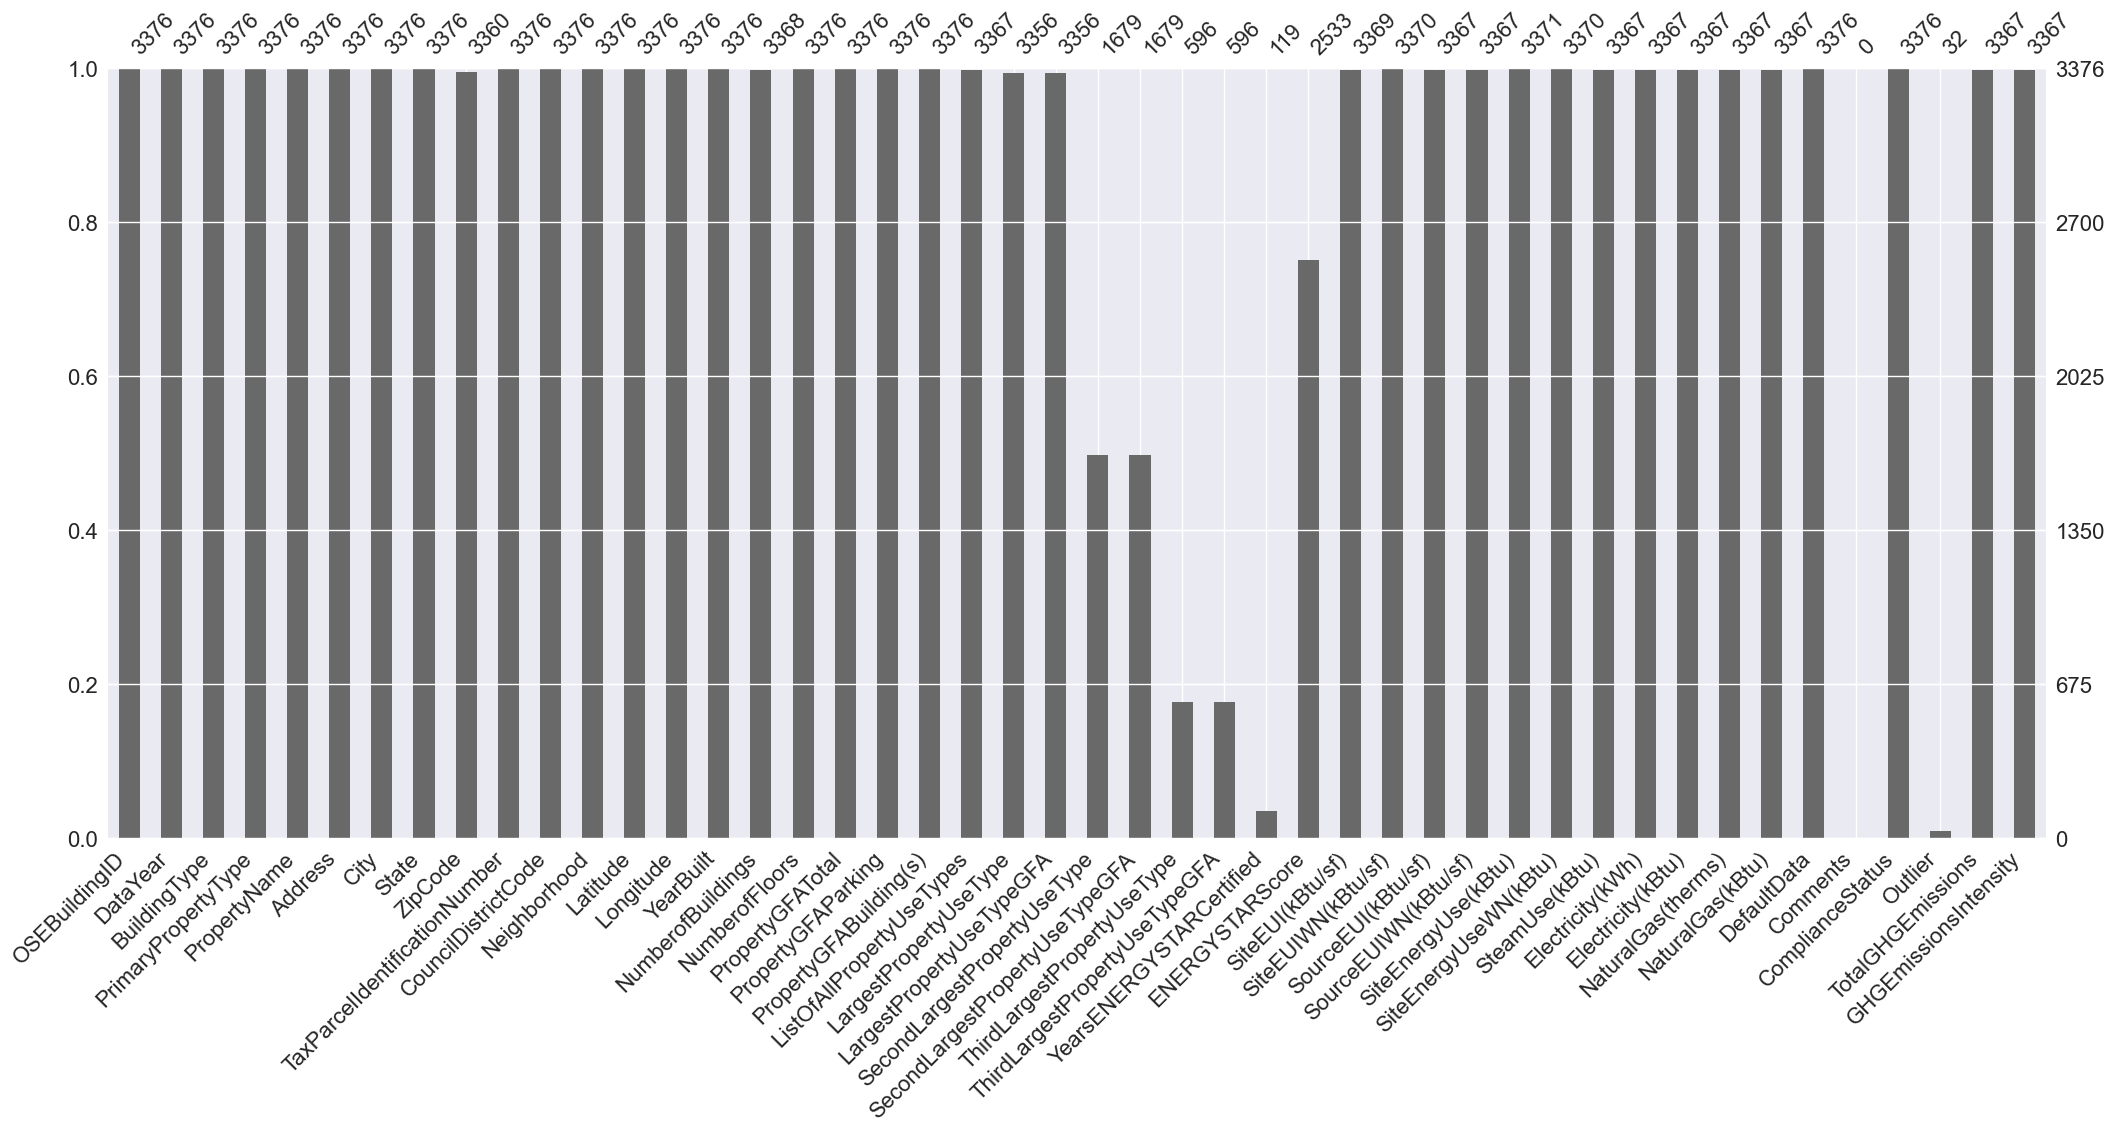

In [47]:
msno.bar(data)

**Remarque :** Plusieurs variables présentent des données manquantes : YearsENERGYSTARCertified - ThirdLargestPropertyUseType - ThirdLargestPropertyUseTypeGFA - SecondLargestPropertyUseType - SecondLargestPropertyUseTypeGFA - ENERGYSTARScore - LargestPropertyUseTypeGFA - LargestPropertyUseType - GHGEmissionsIntensity - TotalGHGEmissions, etc.

<Axes: >

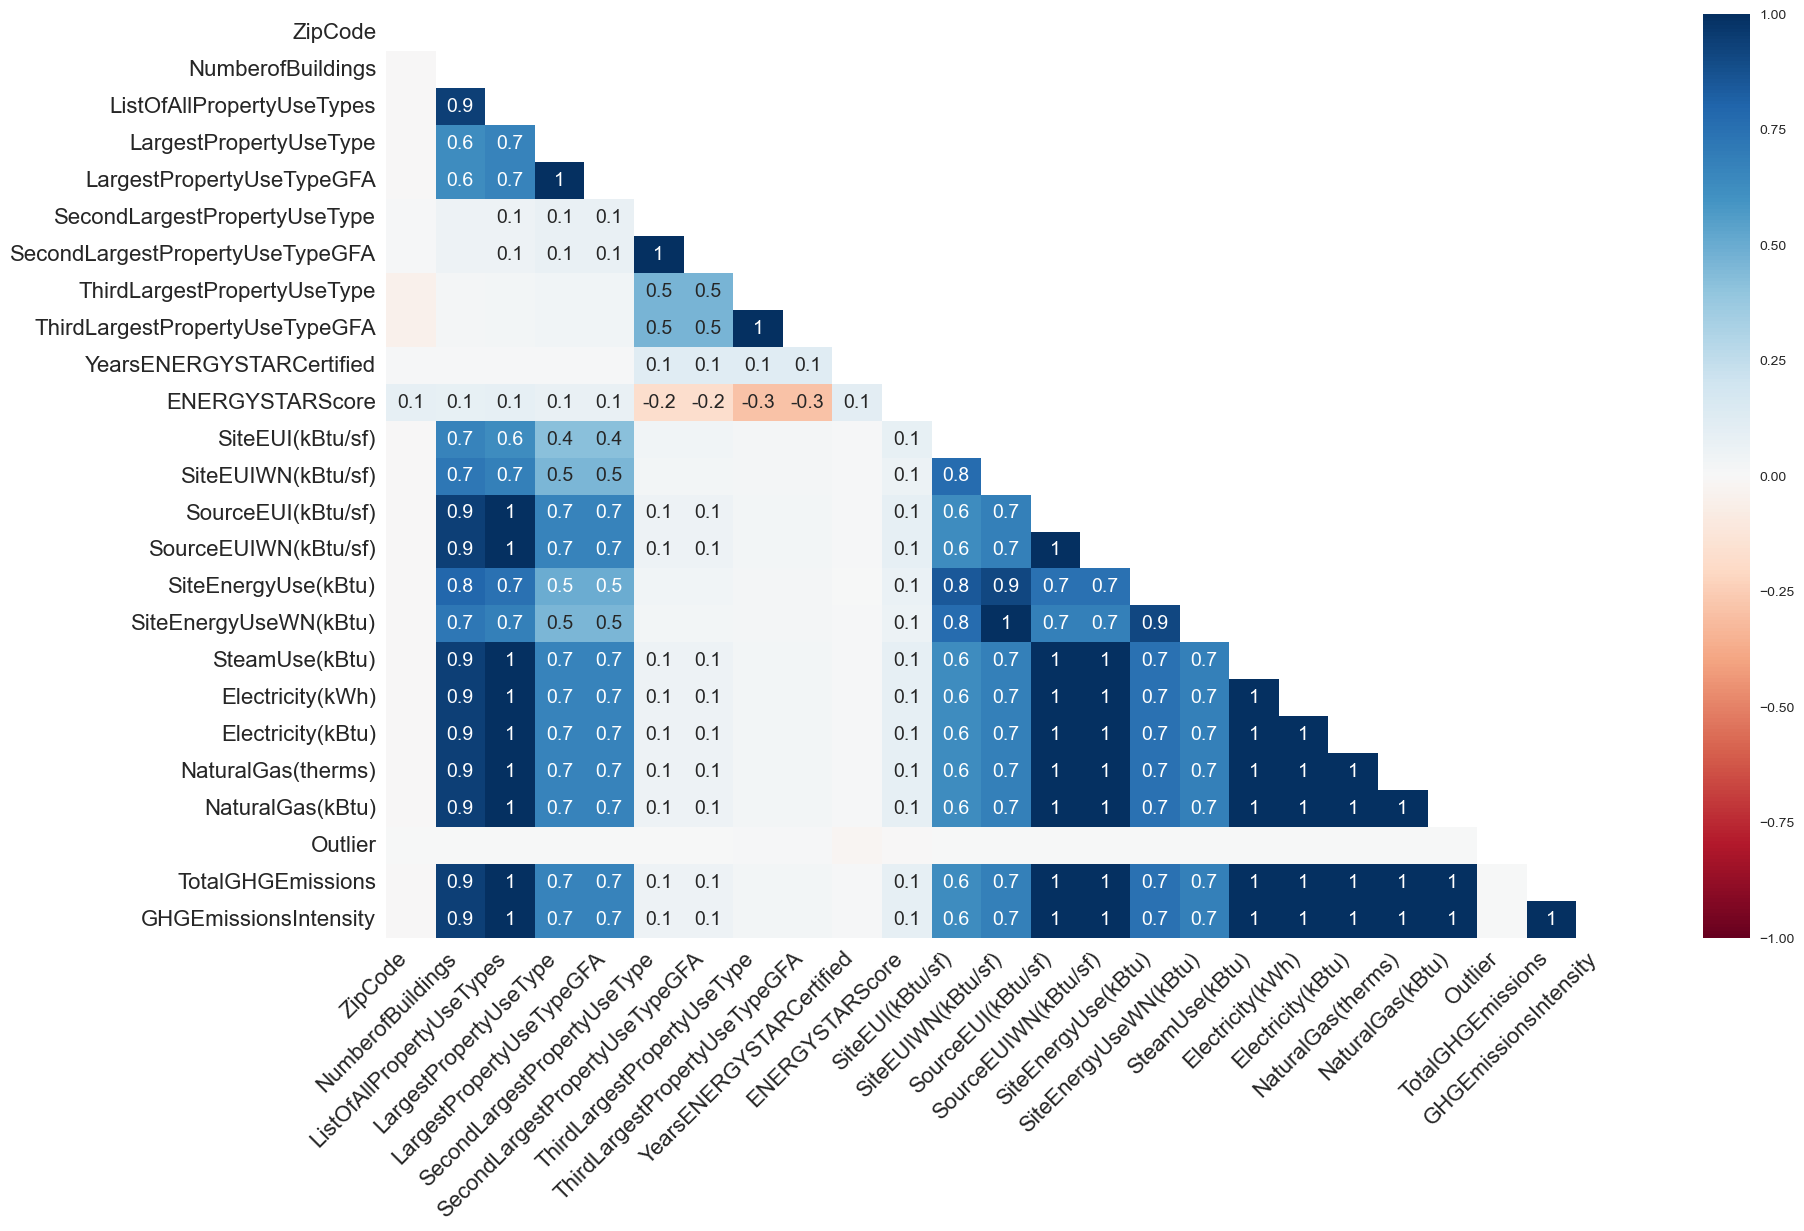

In [48]:
msno.heatmap(data)

<Axes: >

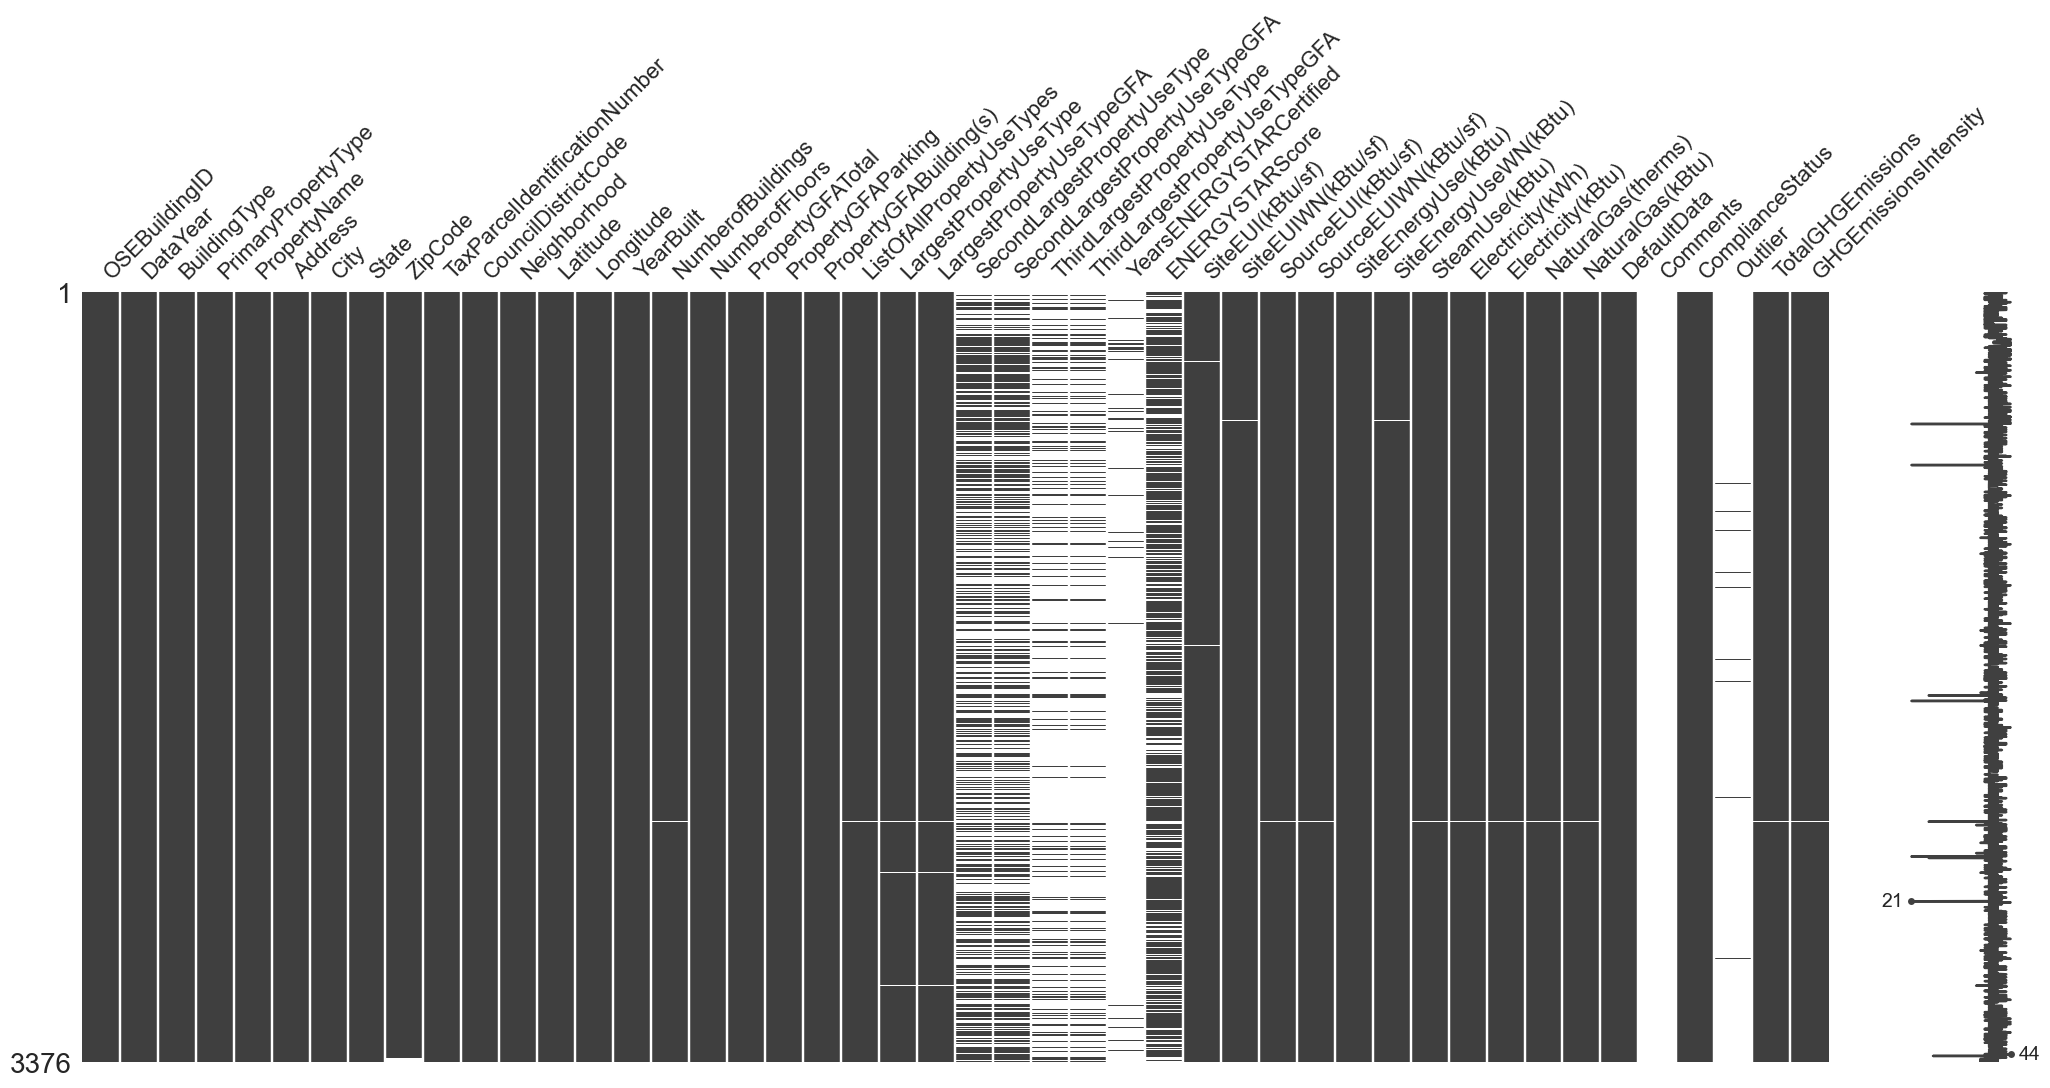

In [49]:
msno.matrix(data)

### Traitement des NA

> **1.Suppression des lignes répertoriées comme des outliers avant de supprimer la colonne.** 

In [50]:
data.Outlier.value_counts(dropna=False)

Outlier
NaN             3344
Low outlier       23
High outlier       9
Name: count, dtype: int64

In [51]:
df = data[data['Outlier'].isnull()] 

> **2.Suppression des colonnes YearsENERGYSTARCertified - comments très peu remplies et qui n'ont pas une grande utilité.**

In [52]:
df = df.drop(['Outlier', 'YearsENERGYSTARCertified','Comments'], axis=1)
df.shape

(3344, 43)

> **3. Pour les variables : usages larges, usages secondaires et tertiaires des batiments,  les codes non renseignées doivent correspondre à aucun usage.**
- Pour la variable usage principale, on la conserve. on conservera les données concernant les surfaces. la forte proportion des NA des autres variables nous poussent à les supprimer

In [53]:
df = df.drop(['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'], axis=1)
df.shape

(3344, 39)

> **4. Suppression de données manquantes : Les batiments ayant des données manquantes pour la variable TotalGHGEmissions seront supprimés (9 observations)**

In [54]:
df = df.dropna(subset=['TotalGHGEmissions'])
df.shape

(3335, 39)

> **5. Imputation par la méthode KNN**

In [55]:
knn_imputer = KNNImputer(n_neighbors=3)
variables = ['NumberofBuildings','LargestPropertyUseTypeGFA','ENERGYSTARScore','SiteEUI(kBtu/sf)',
             'SiteEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)']
df_clean = pd.DataFrame(knn_imputer.fit_transform(df[variables]), columns=variables)
col = df.columns.difference(variables)
df_clean = pd.concat([df[col],df_clean], axis = 1)

In [56]:
df_clean.shape

(3374, 39)

<Axes: >

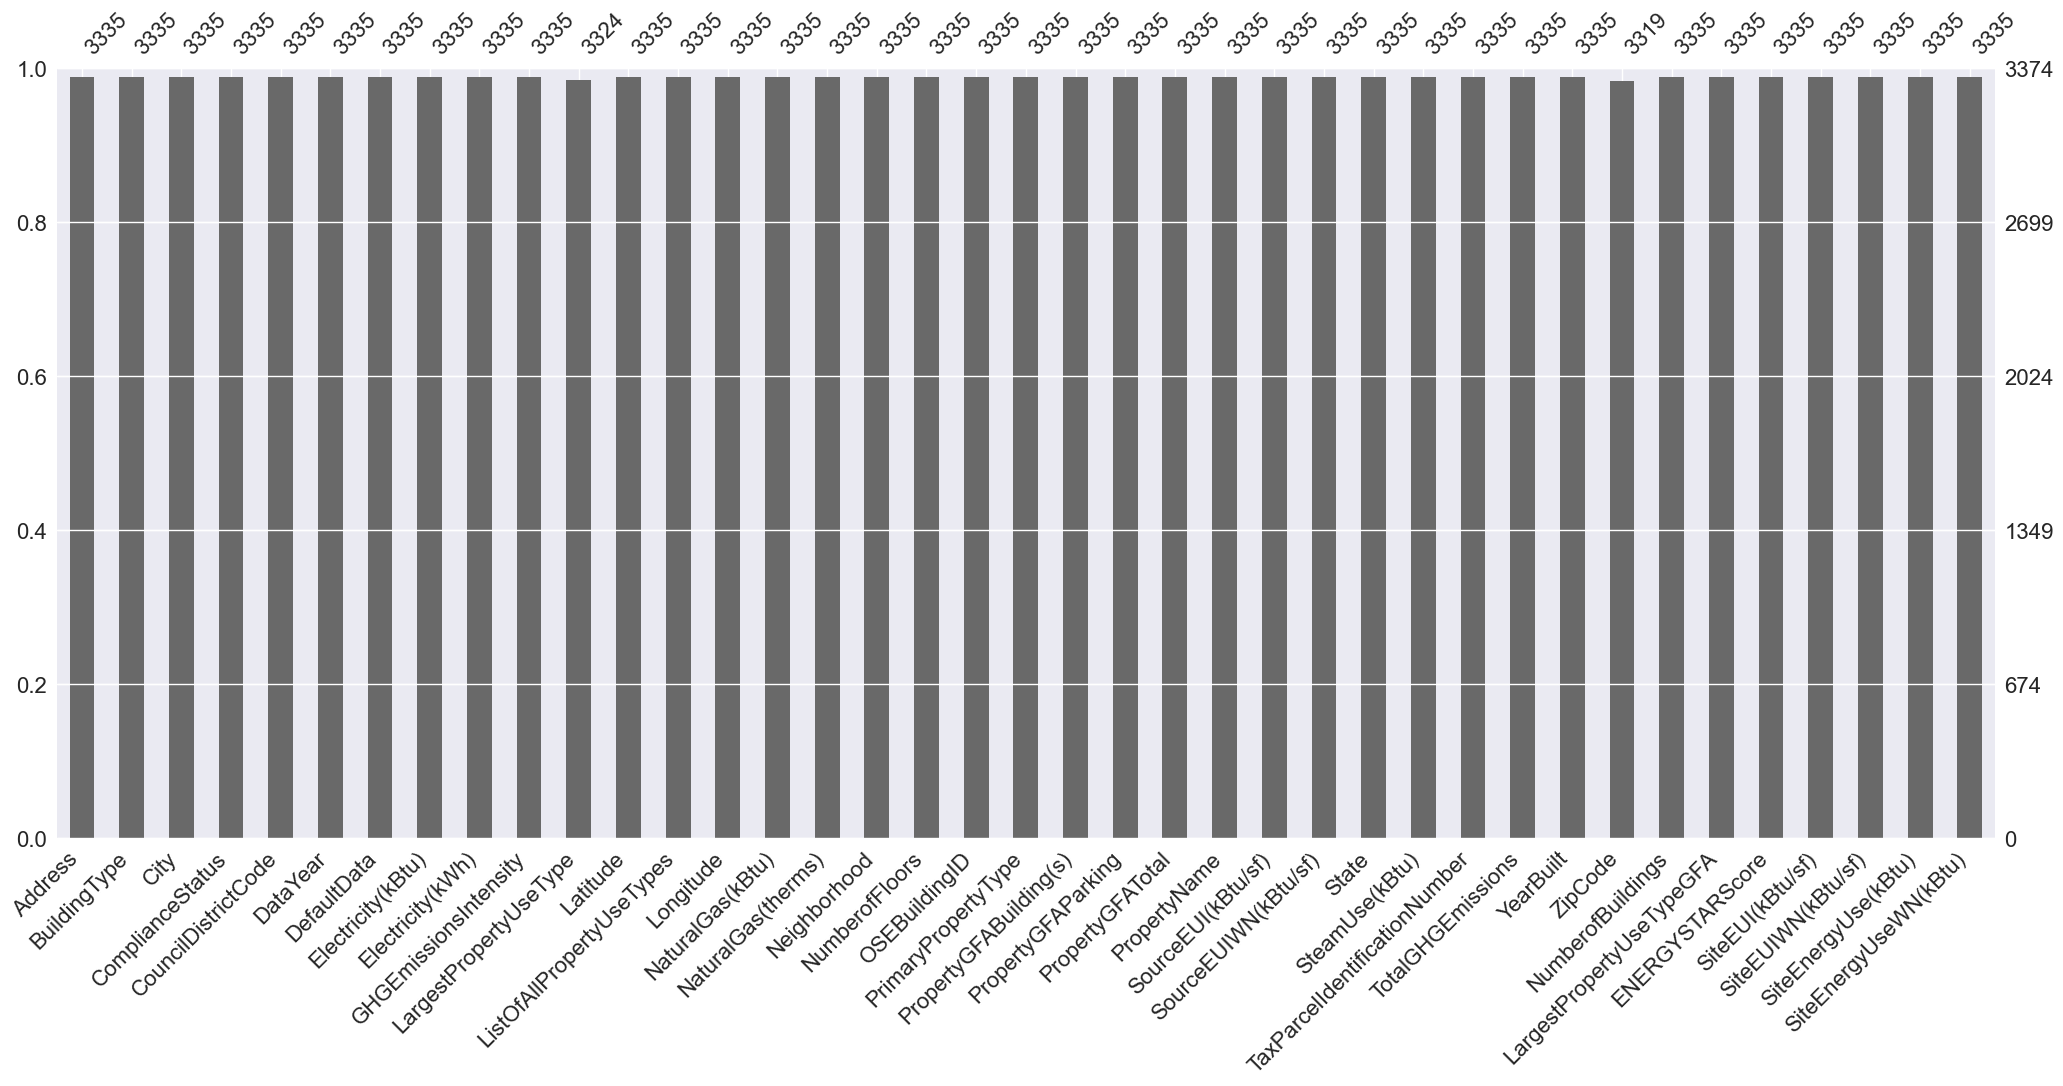

In [57]:
msno.bar(df_clean)

## Suppression des variables unitiles

#### Creation de la variable buildingAge

In [58]:
df_clean['buildingAge'] = df_clean['DataYear'] - df_clean['YearBuilt']

In [59]:
df_clean = df_clean.drop(['DataYear','PropertyName','Address','City','State','ZipCode','TaxParcelIdentificationNumber',
                  'CouncilDistrictCode','YearBuilt','DefaultData','ComplianceStatus',
                   'Electricity(kWh)','NaturalGas(therms)'], axis=1)

In [60]:
df_clean.head()

BuildingType  Electricity(kBtu)  GHGEmissionsIntensity  \
0  NonResidential          3946027.0                   2.83   
1  NonResidential          3242851.0                   2.86   
2  NonResidential         49526664.0                   2.19   
3  NonResidential          2768924.0                   4.67   
4  NonResidential          5368607.0                   2.88   

  LargestPropertyUseType  Latitude      ListOfAllPropertyUseTypes  Longitude  \
0                  Hotel  47.61220                          Hotel -122.33799   
1                  Hotel  47.61317     Hotel, Parking, Restaurant -122.33393   
2                  Hotel  47.61393                          Hotel -122.33810   
3                  Hotel  47.61412                          Hotel -122.33664   
4                  Hotel  47.61375  Hotel, Parking, Swimming Pool -122.34047   

   NaturalGas(kBtu) Neighborhood  NumberofFloors  OSEBuildingID  \
0         1276453.0     DOWNTOWN            12.0            1.0   
1         5145082.0     DOWNTOWN            11.0            2.0   
2         1493800.0     DOWNTOWN            41.0            3.0   
3         1811213.0     DOWNTOWN            10.0            5.0   
4         8803998.0     DOWNTOWN            18.0            8.0   

  PrimaryPropertyType  PropertyGFABuilding(s)  PropertyGFAParking  \
0               Hotel                 88434.0                 0.0   
1               Hotel                 88502.0             15064.0   
2               Hotel                759392.0            196718.0   
3               Hotel                 61320.0                 0.0   
4               Hotel                113580.0             62000.0   

   PropertyGFATotal  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SteamUse(kBtu)  \
0           88434.0          182.500000            189.000000      2003882.00   
1          103566.0          176.100006            179.399994            0.00   
2          956110.0          241.899994            244.100006     21566554.00   
3           61320.0          216.199997            224.000000      2214446.25   
4          175580.0          211.399994            215.600006            0.00   

   TotalGHGEmissions  NumberofBuildings  LargestPropertyUseTypeGFA  \
0             249.98                1.0                    88434.0   
1             295.86                1.0                    83880.0   
2            2089.28                1.0                   756493.0   
3             286.43                1.0                    61320.0   
4             505.01                1.0                   123445.0   

   ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
0             60.0         81.699997           84.300003            7226362.5   
1             61.0         94.800003           97.900002            8387933.0   
2             43.0         96.000000           97.699997           72587024.0   
3             56.0        110.800003          113.300003            6794584.0   
4             75.0        114.800003          118.699997           14172606.0   

   SiteEnergyUseWN(kBtu)  buildingAge  
0              7456910.0         89.0  
1              8664479.0         20.0  
2             73937112.0         47.0  
3              6946800.5         90.0  
4             14656503.0         36.0

In [61]:
df_clean.shape

(3374, 27)

In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3374 entries, 0 to 3265
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingType               3335 non-null   object 
 1   Electricity(kBtu)          3335 non-null   float64
 2   GHGEmissionsIntensity      3335 non-null   float64
 3   LargestPropertyUseType     3324 non-null   object 
 4   Latitude                   3335 non-null   float64
 5   ListOfAllPropertyUseTypes  3335 non-null   object 
 6   Longitude                  3335 non-null   float64
 7   NaturalGas(kBtu)           3335 non-null   float64
 8   Neighborhood               3335 non-null   object 
 9   NumberofFloors             3335 non-null   float64
 10  OSEBuildingID              3335 non-null   float64
 11  PrimaryPropertyType        3335 non-null   object 
 12  PropertyGFABuilding(s)     3335 non-null   float64
 13  PropertyGFAParking         3335 non-null   float64
 1

## Selection des bâtiments non  destinés à l'habitation

Comme le TP porte sur les bâtiments non destinés à l'habitation, les autres observations doivent exclus pour l'analyse

### Recodage de la variable

Explication des modalités :

Campus: College/University, Large Office, Other, Mixed Use Property, K-12 School, Low-Rise Multifamily, Restaurant, University,  

Multifamily HR (10+): High-Rise Multifamily, Other, Senior Care Community, Hotel,  

Multifamily LR (1-4): Low-Rise Multifamily, Mixed Use Property, Other, Senior Care Community, Small- and Mid-Sized Office, College/University, University,  

Multifamily MR (5-9): Mid-Rise Multifamily, Mixed Use Property, Senior Care Community, Other, Residence Hall,  

NonResidential: Hotel, Other, Mixed Use Property, College/University, Small- and Mid-Sized Office, Self-Storage Facility, K-12 School, Large Office, Retail Store, Senior Care Community, Medical Office, Hospital, Residence Hall/Dormitory, Non-Refrigerated Warehouse, Worship Facility, Supermarket/Grocery Store, Distribution Center, Refrigerated Warehouse, Restaurant, Low-Rise Multifamily, University, Warehouse, Residence Hall, Laboratory,  

Nonresidential COS: Other, Non-Refrigerated Warehouse, Small- and Mid-Sized Office, Distribution Center, Large Office, Mixed Use Property, Medical Office, Warehouse, Office,  

Nonresidential WA: University,  

SPS-District K-12: K-12 School, Other,


In [63]:
code_building = {'NonResidential': 'NonResidential',
                'Nonresidential COS': 'NonResidential',
                'Multifamily MR (5-9)': 'Residential',
                'SPS-District K-12': 'School',
                'Campus': 'Campus',
                'Multifamily LR (1-4)': 'Residential',
                'Multifamily HR (10+)': 'Residential',
                'Nonresidential WA': 'NonResidential'}

df_clean['BuildingType'] =df_clean['BuildingType'].map(code_building)

In [64]:
df_clean = df_clean[df_clean['BuildingType'] != 'Residential'].copy()

In [65]:
df_clean.shape

(1688, 27)

In [66]:
df_clean.BuildingType.value_counts()

BuildingType
NonResidential    1528
School              97
Campus              24
Name: count, dtype: int64

# Analyses exploratoires

## Analyse des variables emissions de CO2 : TotalGHGEmissions - GHGEmissionsIntensity

In [67]:
df_clean[df_clean['TotalGHGEmissions'] <= 0]

BuildingType  Electricity(kBtu)  GHGEmissionsIntensity  \
28            School                0.0                   0.00   
152           School                0.0                   0.00   
304   NonResidential                0.0                   0.00   
513   NonResidential                0.0                   0.00   
746   NonResidential                0.0                   0.00   
1361          School                0.0                   0.00   
3206  NonResidential          -115417.0                  -0.02   

         LargestPropertyUseType  Latitude  \
28                  K-12 School  47.62266   
152                 K-12 School  47.69823   
304           Convention Center  47.61195   
513   Supermarket/Grocery Store  47.63718   
746           Other - Education  47.72777   
1361                K-12 School  47.72369   
3206                     Office  47.61432   

                              ListOfAllPropertyUseTypes  Longitude  \
28                                          K-12 School -122.30547   
152                                         K-12 School -122.32126   
304                          Convention Center, Parking -122.33167   
513   Personal Services (Health/Beauty, Dry Cleaning... -122.37734   
746                                   Other - Education -122.34503   
1361                                        K-12 School -122.30676   
3206                                             Office -122.31257   

      NaturalGas(kBtu)           Neighborhood  NumberofFloors  OSEBuildingID  \
28                 0.0                Central             1.0           34.0   
152                0.0                  NORTH             2.0          242.0   
304                0.0               DOWNTOWN             6.0          435.0   
513                0.0  MAGNOLIA / QUEEN ANNE             1.0          700.0   
746                0.0              NORTHWEST             1.0        19776.0   
1361               0.0                  NORTH             1.0        21616.0   
3206               0.0                CENTRAL             6.0        49784.0   

              PrimaryPropertyType  PropertyGFABuilding(s)  PropertyGFAParking  \
28                    K-12 School                126351.0                 0.0   
152                   K-12 School                 52792.0                 0.0   
304                         Other               1400000.0                 0.0   
513   Supermarket / Grocery Store                 57176.0                 0.0   
746                         Other                 29924.0                 0.0   
1361                  K-12 School                 42292.0                 0.0   
3206  Small- and Mid-Sized Office                 52000.0                 0.0   

      PropertyGFATotal  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
28            126351.0                 0.0                   0.0   
152            52792.0                 0.0                   0.0   
304          1400000.0                 0.0                   0.0   
513            57176.0                 0.0                   0.0   
746            29924.0                 0.0                   0.0   
1361           42292.0                 0.0                   0.0   
3206           52000.0                 2.0                  -2.1   

      SteamUse(kBtu)  TotalGHGEmissions  NumberofBuildings  \
28               0.0                0.0                1.0   
152              0.0                0.0                1.0   
304              0.0                0.0                1.0   
513              0.0                0.0                1.0   
746              0.0                0.0                1.0   
1361             0.0                0.0                1.0   
3206             0.0               -0.8                1.0   

      LargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
28                     126351.0        99.666667          0.000000   
152                     55480.0        99.666667          0.000000   
304            

In [68]:
df_clean = df_clean[df_clean['TotalGHGEmissions'] > 0].copy()

In [69]:
df_clean.to_csv('data_clean.csv', index=False)

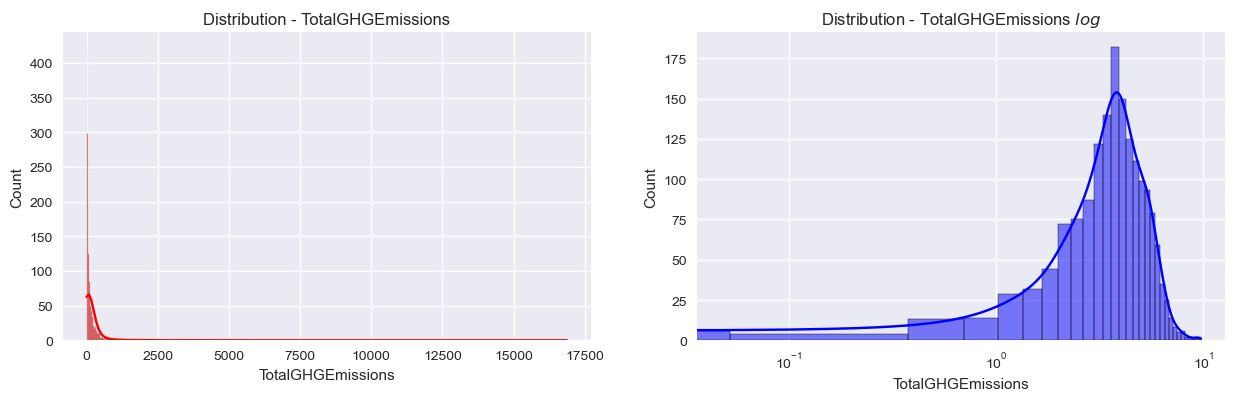

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(df_clean["TotalGHGEmissions"], color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution - TotalGHGEmissions')

sns.histplot(np.log(df_clean["TotalGHGEmissions"]), color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution - TotalGHGEmissions $log$')
axes[1].set_xscale('log');

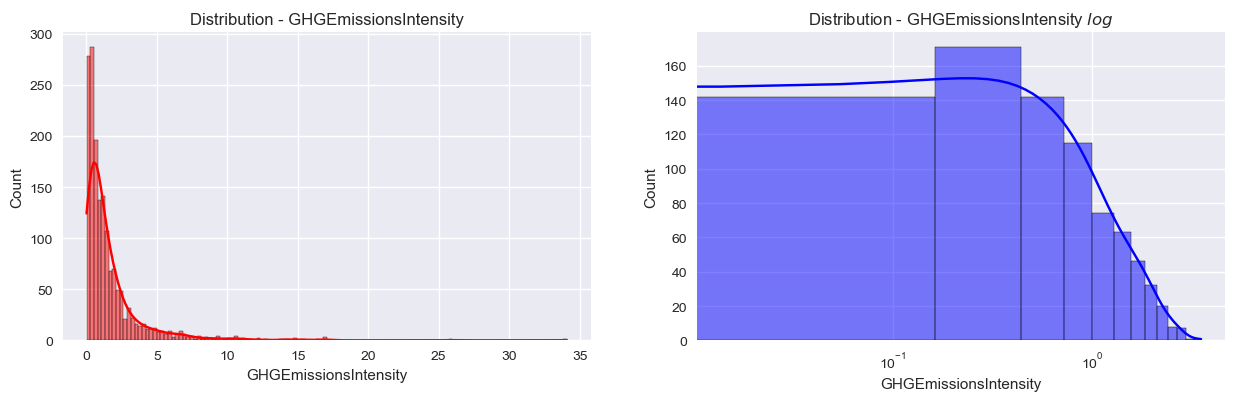

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(df_clean["GHGEmissionsIntensity"], color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution - GHGEmissionsIntensity')

sns.histplot(np.log(df_clean["GHGEmissionsIntensity"]), color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution - GHGEmissionsIntensity $log$')
axes[1].set_xscale('log');

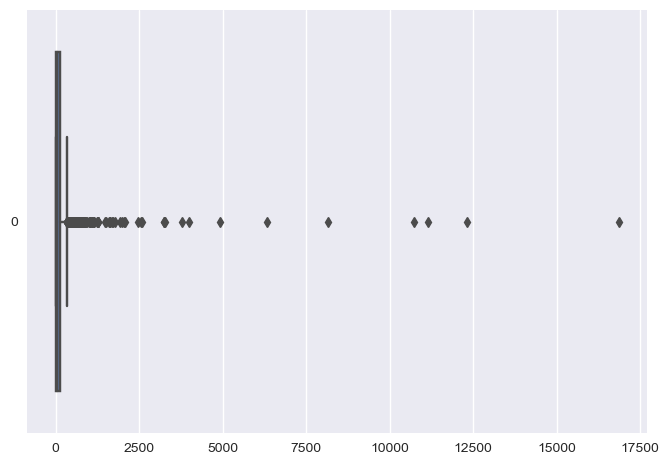

In [72]:
sns.boxplot(df_clean["TotalGHGEmissions"], orient="h");

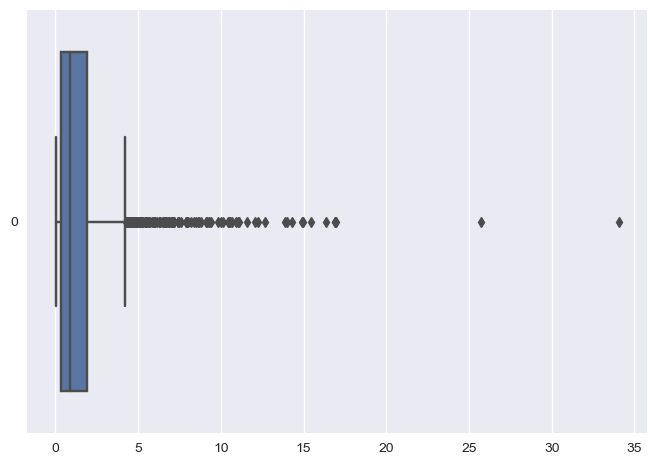

In [73]:
sns.boxplot(df_clean["GHGEmissionsIntensity"], orient="h");

## Analyse des bâtiments

### Représentation géographique

In [74]:
def plot_map(column):
    
    fig = px.scatter_mapbox(df_clean,
                           lat='Latitude',
                           lon='Longitude',
                           color=column,
                           hover_name='PrimaryPropertyType')
    
    fig.update_layout(mapbox_style='open-street-map')
    
    title = 'map-' + column
    pyo.iplot(fig, title)

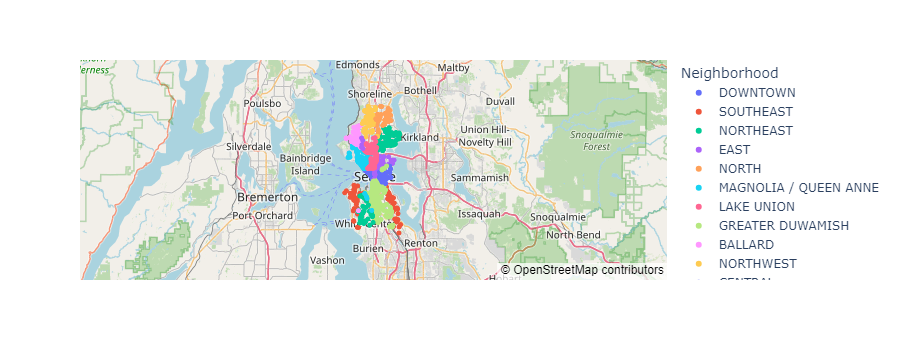

In [75]:
plot_map('Neighborhood')

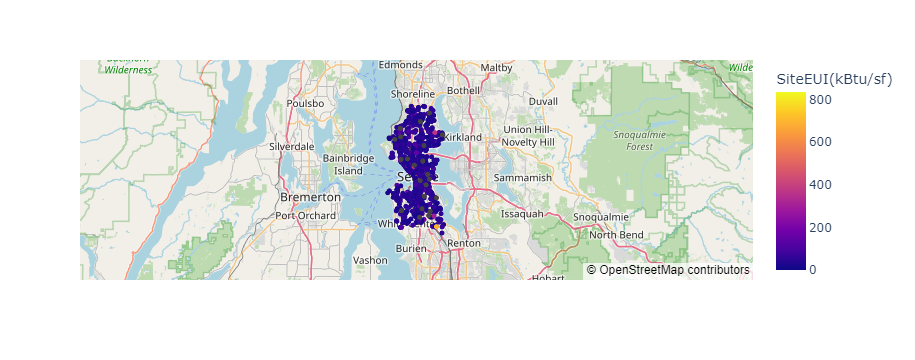

In [76]:
plot_map('SiteEUI(kBtu/sf)')

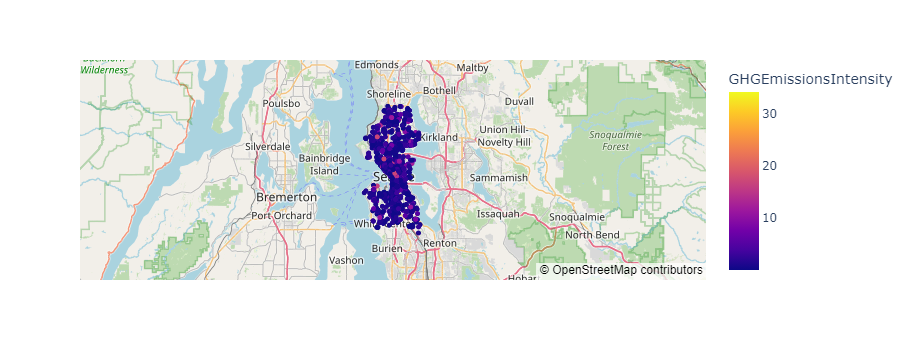

In [77]:
plot_map('GHGEmissionsIntensity')

### Age des bâtiments

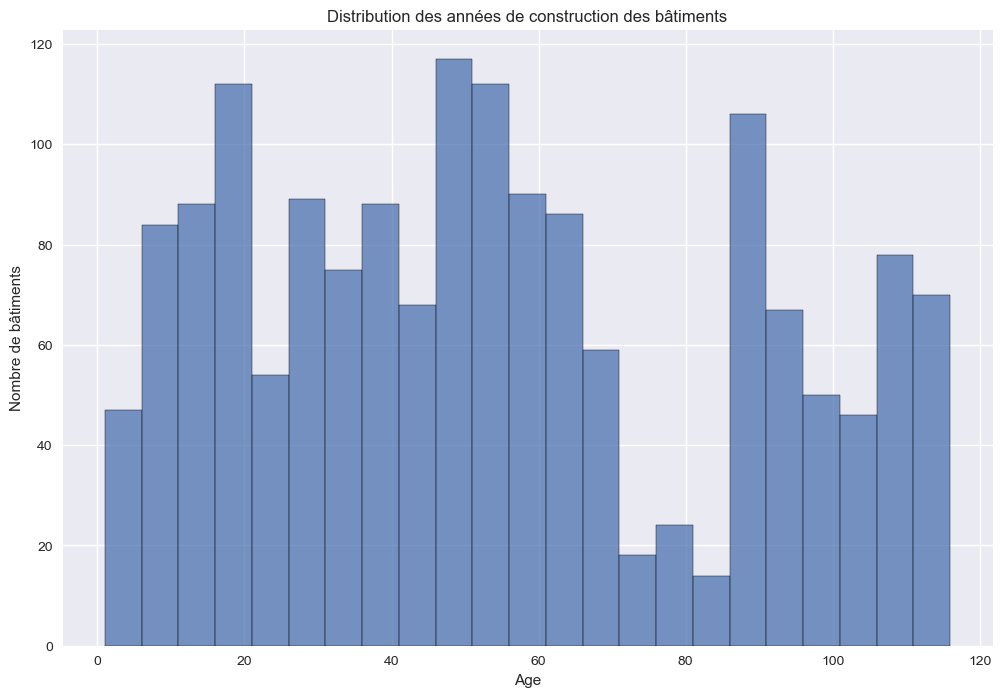

In [78]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=df_clean, x='buildingAge', bins=int((df_clean.buildingAge.max() - df_clean.buildingAge.min())/5))
ax.set_xlabel("Age")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments")
plt.show()

### Nature des bâtiments

In [79]:
def visualisation(var,data):
    # the_mean=df["GHGEmissions(MetricTonsCO2e)"].mean()
    the_mean=data["GHGEmissionsIntensity"].mean()
    fig=plt.figure(figsize=[18,7])
    fig.patch.set_facecolor('#E0E0E0')
    fig.patch.set_alpha(0.7)
    plt.title("Distribution des émissions de CO2 selon {}".format(var),size=16)
    sns.boxplot(x=var, y="GHGEmissionsIntensity", data=data,color="#cbd1db",width=0.5,showfliers=False,showmeans=True)
    plt.hlines(y=the_mean,xmin=-0.5,xmax=len(data[var].unique())-0.5,color="#6d788b",ls="--",label="Moyenne Globale")

    plt.ylabel("Emissions de CO2",size=14)
    plt.xticks(range(0,len(data[var].unique()))
               ,data[var].unique(),rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

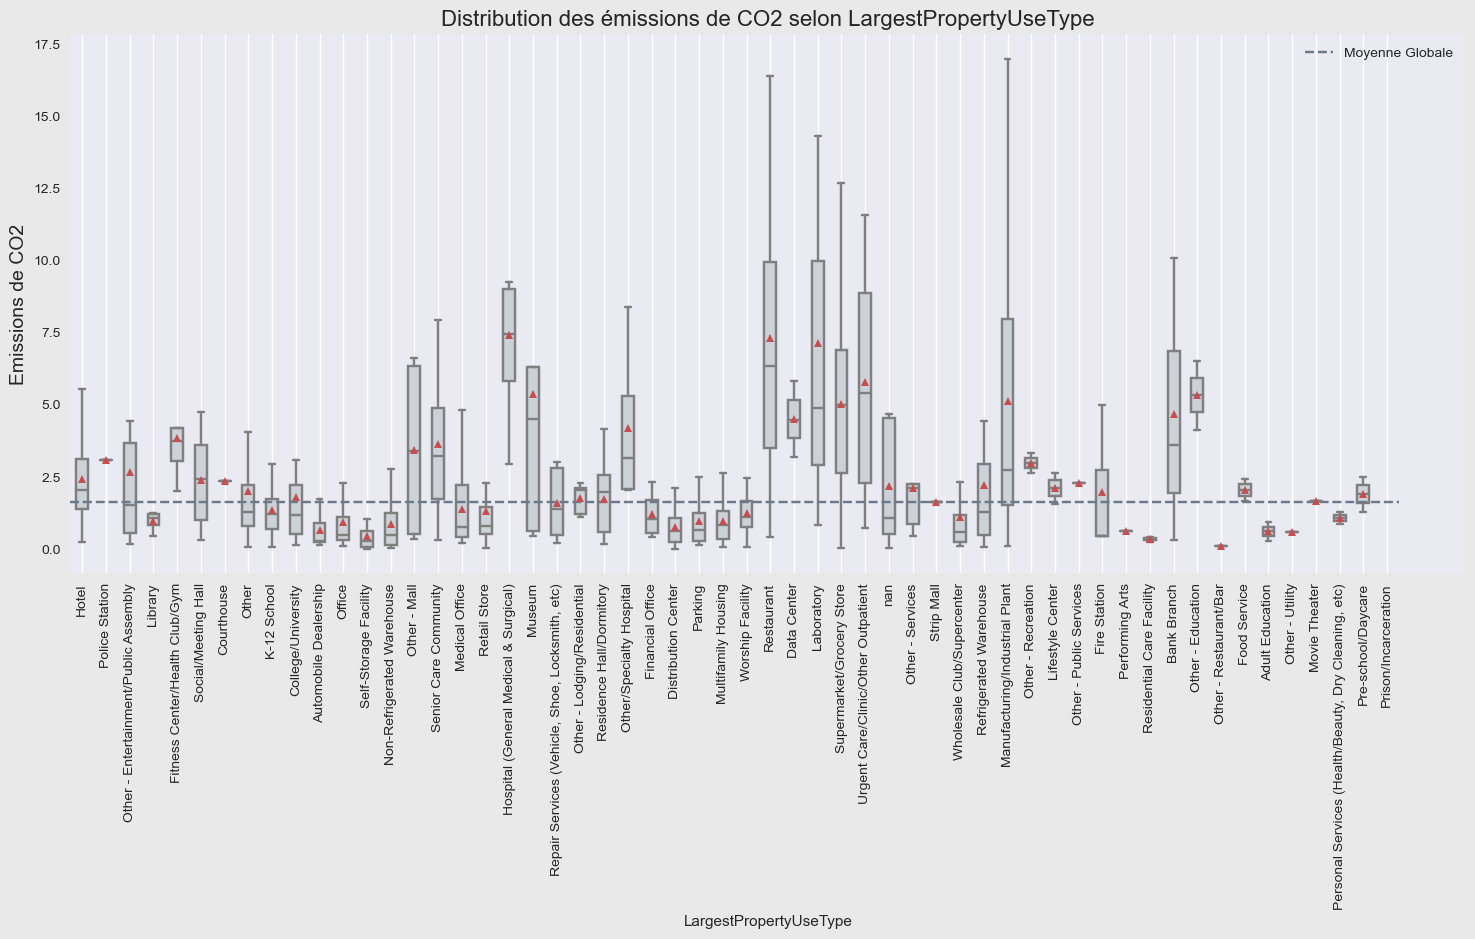

In [80]:
visualisation('LargestPropertyUseType',df_clean)

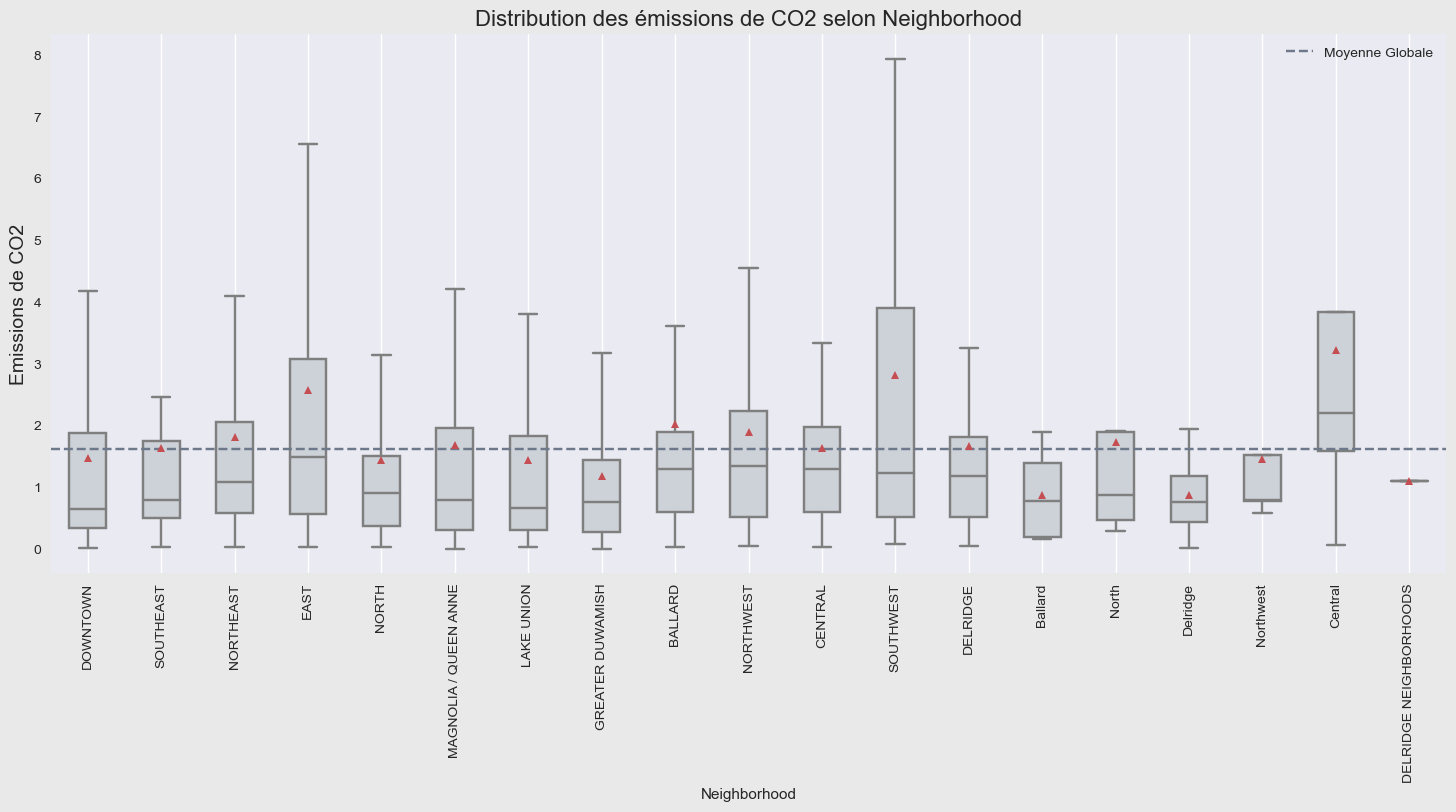

In [81]:
visualisation('Neighborhood',df_clean)

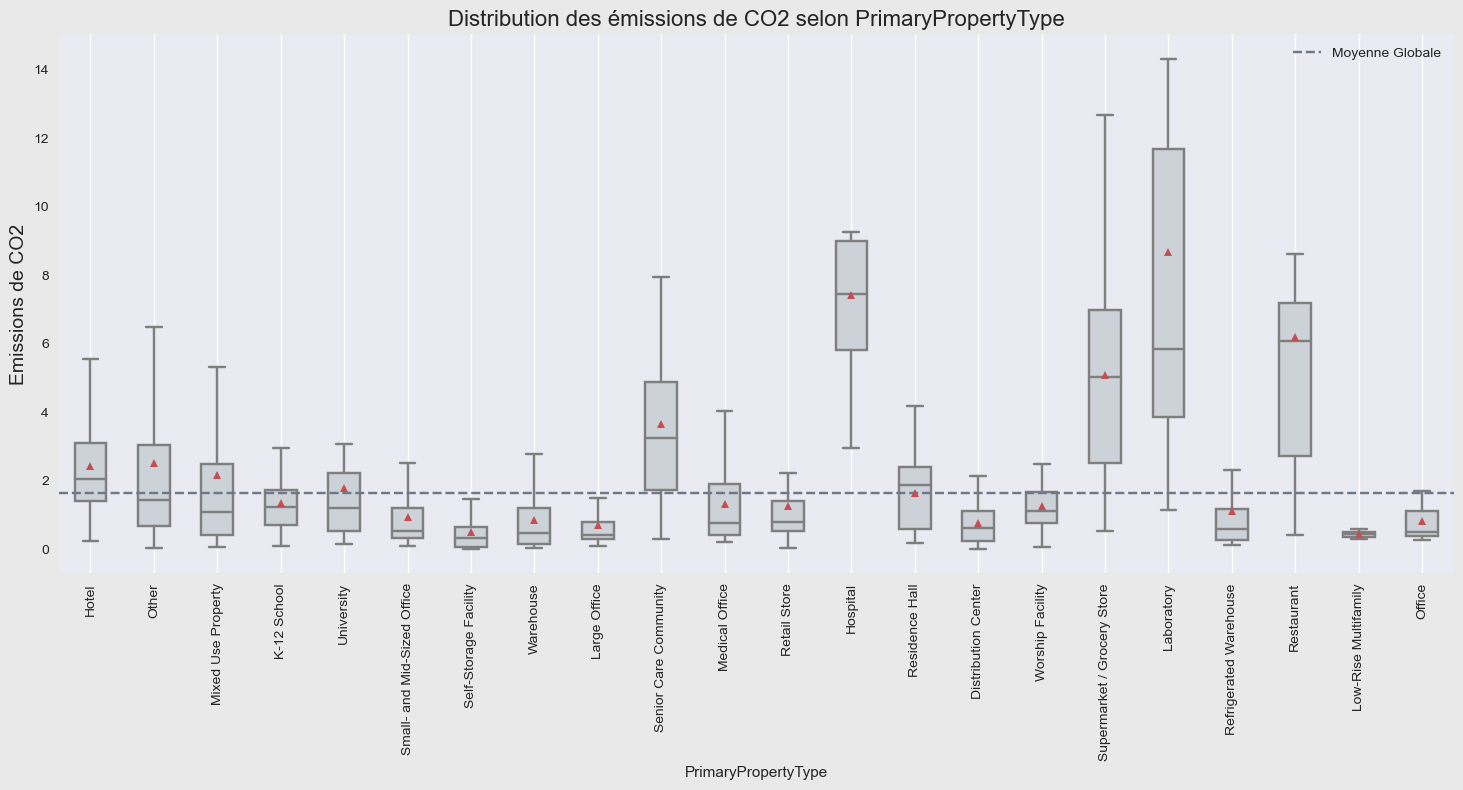

In [82]:
visualisation('PrimaryPropertyType',df_clean)

### Analyse des colonnes "Weather Normalized" 

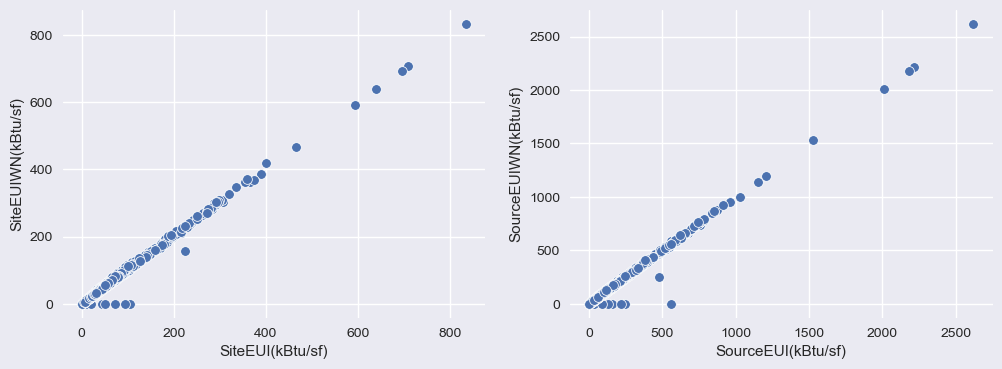

In [83]:
fig, ax = plt.subplots(1,2,figsize=(12,4), facecolor="#eaeaf2")

sns.scatterplot(data=df_clean, ax=ax[0], x='SiteEUI(kBtu/sf)', y='SiteEUIWN(kBtu/sf)')
sns.scatterplot(data=df_clean, ax=ax[1], x='SourceEUI(kBtu/sf)', y='SourceEUIWN(kBtu/sf)');


In [84]:
df_clean.drop(['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)'],
       axis=1, inplace=True)

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1642 entries, 0 to 3375
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingType               1642 non-null   object 
 1   Electricity(kBtu)          1642 non-null   float64
 2   GHGEmissionsIntensity      1642 non-null   float64
 3   LargestPropertyUseType     1638 non-null   object 
 4   Latitude                   1642 non-null   float64
 5   ListOfAllPropertyUseTypes  1642 non-null   object 
 6   Longitude                  1642 non-null   float64
 7   NaturalGas(kBtu)           1642 non-null   float64
 8   Neighborhood               1642 non-null   object 
 9   NumberofFloors             1642 non-null   float64
 10  OSEBuildingID              1642 non-null   float64
 11  PrimaryPropertyType        1642 non-null   object 
 12  PropertyGFABuilding(s)     1642 non-null   float64
 13  PropertyGFAParking         1642 non-null   float64
 1

### Creation de ratios à utiliser pour la prédiction

In [86]:
df_clean['SteamRatio'] = df_clean['SteamUse(kBtu)'] / df_clean['SiteEnergyUse(kBtu)']
df_clean['ElectricityRatio'] = df_clean['Electricity(kBtu)'] / df_clean['SiteEnergyUse(kBtu)']
df_clean['NaturalGasRatio'] = df_clean['NaturalGas(kBtu)'] / df_clean['SiteEnergyUse(kBtu)']

In [87]:
# Variables à utiliser juste pour les analyses
df_clean['SteamRatio10'] = (df_clean['SteamRatio'] * 100 + 9)  // 10
df_clean['ElectricityRatio10'] = (df_clean['ElectricityRatio'] * 100 + 9) // 10
df_clean['NaturalGasRatio10'] = (df_clean['NaturalGasRatio'] * 100 + 9) // 10

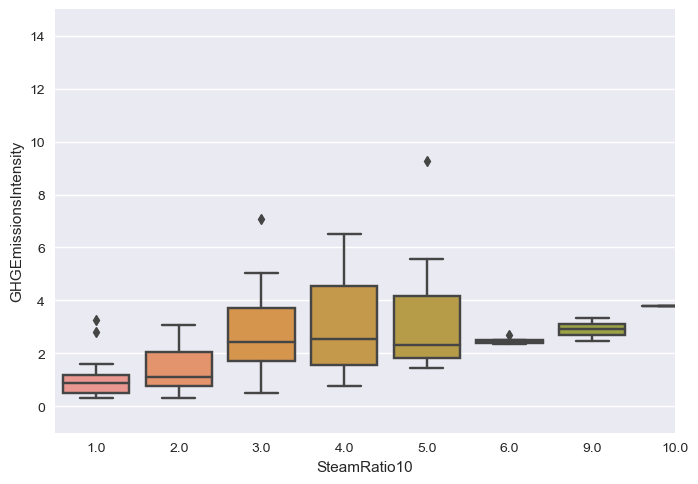

In [88]:
sns.boxplot(data=df_clean, x='SteamRatio10', y='GHGEmissionsIntensity')
plt.ylim([-1,15])
plt.xlim([0.5,8]);

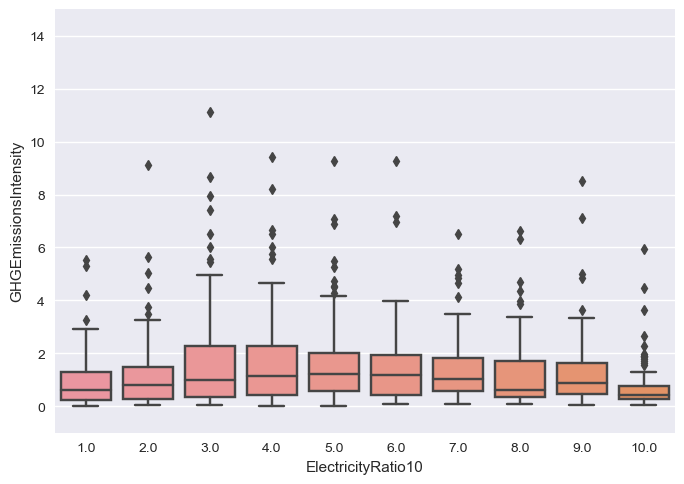

In [89]:
sns.boxplot(data=df_clean, x='ElectricityRatio10', y='GHGEmissionsIntensity')
plt.ylim([-1,15])
plt.xlim([0.5,10.5]);

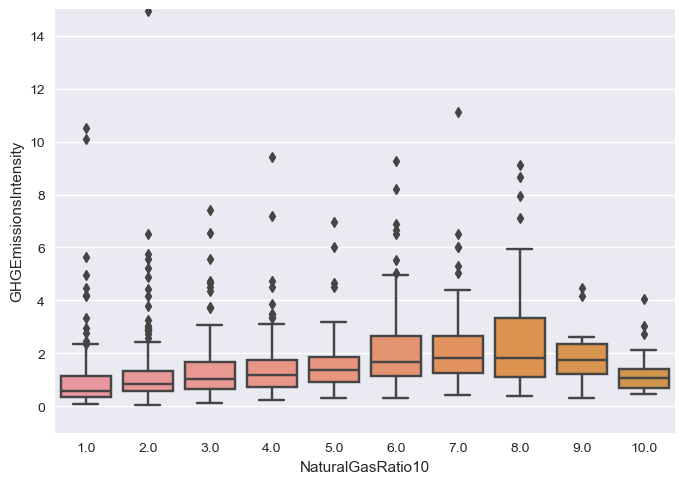

In [90]:
sns.boxplot(data=df_clean, x='NaturalGasRatio10', y='GHGEmissionsIntensity')
plt.ylim([-1,15])
plt.xlim([0.5, 10.5]);

### Analyse de EnergyStar Score

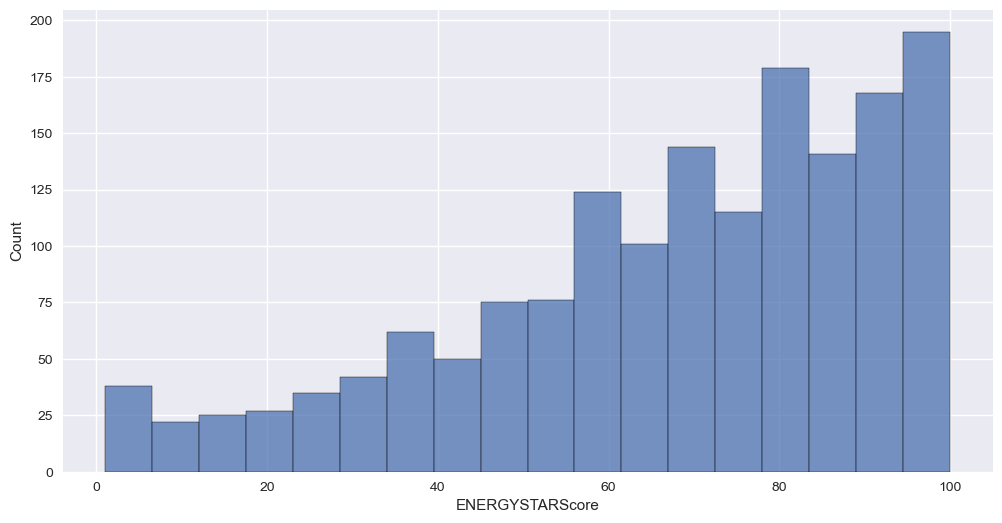

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_clean, x='ENERGYSTARScore');

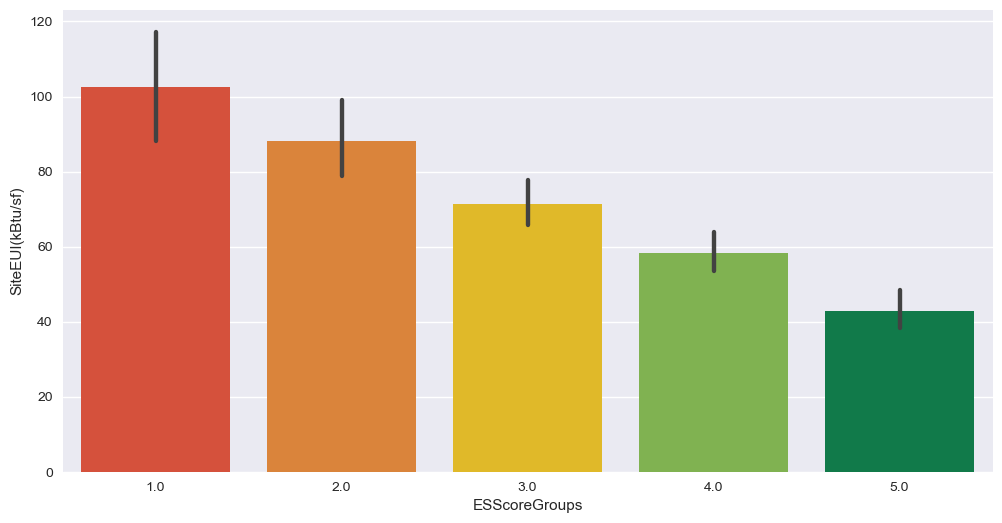

In [92]:
custom_palette = ["#ef3e22", "#f58220", '#feca0a', '#7fc241', "#008b4c"]
df_clean['ESScoreGroups'] = (df_clean['ENERGYSTARScore']+19) // 20 #creation de cinq groupes allant de 1 a 5
plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='ESScoreGroups', y='SiteEUI(kBtu/sf)', palette = custom_palette);

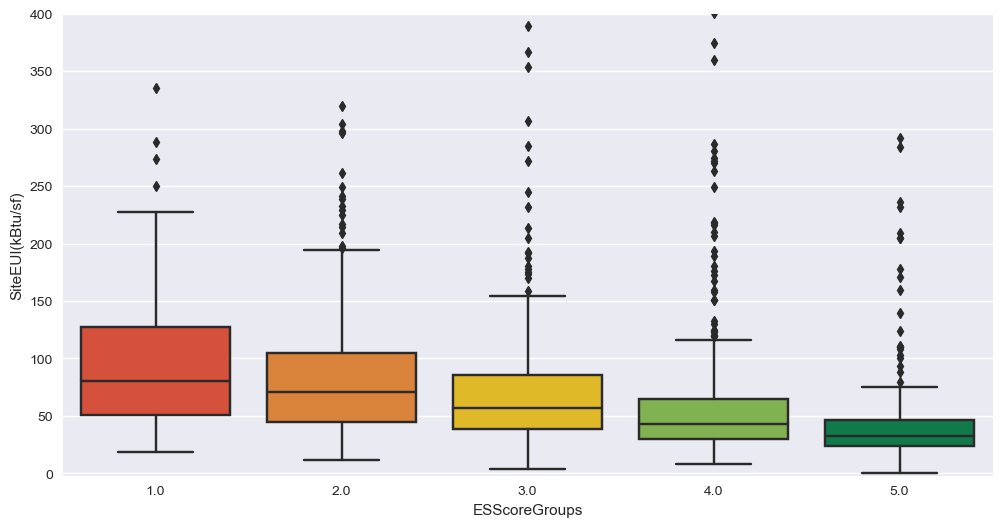

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x='ESScoreGroups', y='SiteEUI(kBtu/sf)', palette=custom_palette)
plt.ylim([-2,400]);

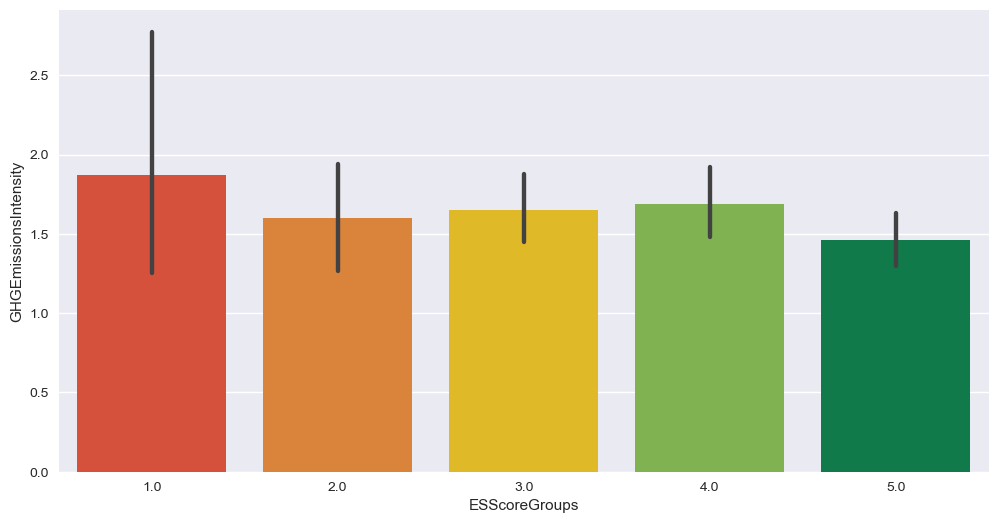

In [94]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='ESScoreGroups', y='GHGEmissionsIntensity', palette=custom_palette);

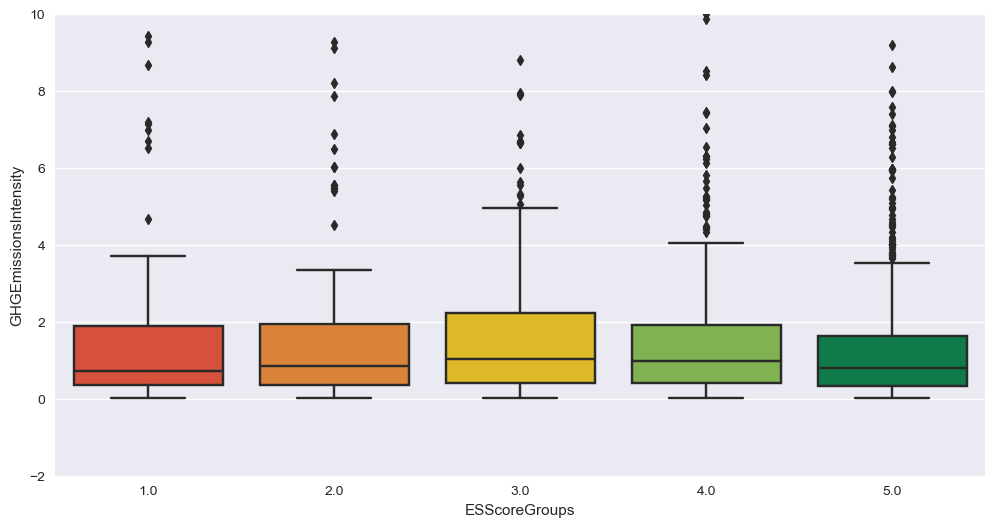

In [95]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean, x='ESScoreGroups', y='GHGEmissionsIntensity', palette=custom_palette)
plt.ylim([-2, 10]);

**Nous pouvons facilement constater la corrélation entre le score ENERGYSTAR et la consommation d'énergie.
Sur le graphique à barres, la consommation d'énergie moyenne est deux fois moindre pour les bâtiments du groupe 5, ceux ayant les scores ENERGYSTAR les plus élevés, par rapport au groupe avec les scores les plus bas. Les émissions de GES sont trois fois plus élevées pour les bâtiments ayant des scores ENERGYSTAR bas.**

## Analyse des correlations

In [96]:
df_clean.select_dtypes(include=[int, float]).corr(method="pearson")

Electricity(kBtu)  GHGEmissionsIntensity  Latitude  \
Electricity(kBtu)                   1.000000               0.158347  0.011845   
GHGEmissionsIntensity               0.158347               1.000000  0.041886   
Latitude                            0.011845               0.041886  1.000000   
Longitude                           0.024674               0.005421 -0.098243   
NaturalGas(kBtu)                    0.277653               0.497022  0.001966   
NumberofFloors                      0.281500              -0.050986 -0.008760   
OSEBuildingID                      -0.098413               0.087191  0.036346   
PropertyGFABuilding(s)              0.878957               0.004536  0.001055   
PropertyGFAParking                  0.199680              -0.095041  0.039725   
PropertyGFATotal                    0.868153              -0.009249  0.006685   
SourceEUI(kBtu/sf)                  0.293061               0.514925  0.085667   
SteamUse(kBtu)                      0.548401               0.189241 -0.004947   
TotalGHGEmissions                   0.686845               0.466620  0.000782   
NumberofBuildings                   0.031658              -0.006570 -0.022184   
LargestPropertyUseTypeGFA           0.130997               0.009104 -0.012110   
ENERGYSTARScore                     0.012487              -0.037503  0.036053   
SiteEUI(kBtu/sf)                    0.110916               0.075376 -0.009678   
SiteEnergyUse(kBtu)                 0.211061               0.163876 -0.014723   
buildingAge                        -0.073054               0.013987 -0.060717   
SteamRatio                          0.532012               0.148240  0.003410   
ElectricityRatio                    0.813160               0.076406  0.031642   
NaturalGasRatio                     0.063069               0.285381  0.054406   
SteamRatio10                        0.532011               0.148592  0.003310   
ElectricityRatio10                  0.813126               0.076439  0.031634   
NaturalGasRatio10                   0.062821               0.286369  0.054597   
ESScoreGroups                       0.002499              -0.040227  0.038361   

                           Longitude  NaturalGas(kBtu)  NumberofFloors  \
Electricity(kBtu)           0.024674          0.277653        0.281500   
GHGEmissionsIntensity       0.005421          0.497022       -0.050986   
Latitude                   -0.098243          0.001966       -0.008760   
Longitude                   1.000000          0.036475       -0.013060   
NaturalGas(kBtu)            0.036475          1.000000        0.034163   
NumberofFloors             -0.013060          0.034163        1.000000   
OSEBuildingID               0.090758         -0.073615       -0.253787   
PropertyGFABuilding(s)      0.027026          0.158406        0.350825   
PropertyGFAParking         -0.026438          0.027415        0.503210   
PropertyGFATotal            0.022038          0.155234        0.407037   
SourceEUI(kBtu/sf)         -0.014537          0.157496        0.062300   
SteamUse(kBtu)              0.021299          0.018503        0.092659   
TotalGHGEmissions           0.040954          0.725851        0.129283   
NumberofBuildings           0.005994          0.030361        0.004359   
LargestPropertyUseTypeGFA  -0.005405          0.106168        0.184247   
ENERGYSTARScore            -0.011586         -0.075383        0.065267   
SiteEUI(kBtu/sf)            0.014463          0.139257        0.066776   
SiteEnergyUse(kBtu)         0.010740          0.409373        0.128644   
buildingAge                -0.021606         -0.056950       -0.094730   
SteamRatio                  0.022311          0.020446        0.034734   
ElectricityRatio            0.022153          0.042452        0.022095   
NaturalGasRatio            -0.001634          0.275999       -0.023144   
SteamRatio10                0.022278          0.020386        0.035374   
ElectricityRatio10          0.022207          0.042499        0

<Figure size 1000x700 with 0 Axes>

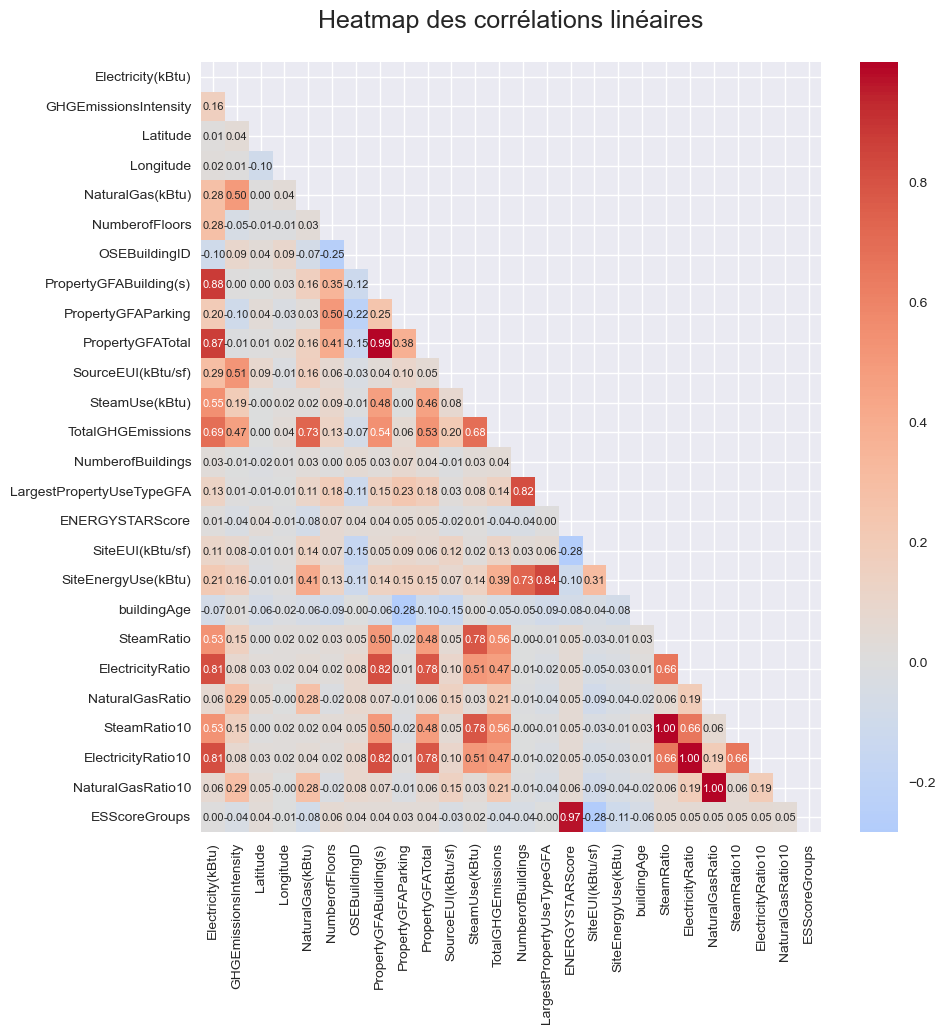

In [97]:
# correlation plot
plt.figure(figsize=(10, 7))
corr = df_clean.select_dtypes(include=[int, float]).corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", fontsize = 18)
plt.show()

In [98]:
threshold = 0.5
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

level_0                 level_1  corr_coeff
74           ElectricityRatio      ElectricityRatio10    0.999998
72                 SteamRatio            SteamRatio10    0.999995
70            NaturalGasRatio       NaturalGasRatio10    0.999974
68     PropertyGFABuilding(s)        PropertyGFATotal    0.990358
66            ENERGYSTARScore           ESScoreGroups    0.971367
64     PropertyGFABuilding(s)       Electricity(kBtu)    0.878957
62          Electricity(kBtu)        PropertyGFATotal    0.868153
60  LargestPropertyUseTypeGFA     SiteEnergyUse(kBtu)    0.840639
58     PropertyGFABuilding(s)        ElectricityRatio    0.817764
56         ElectricityRatio10  PropertyGFABuilding(s)    0.817743
54  LargestPropertyUseTypeGFA       NumberofBuildings    0.816708
52           ElectricityRatio       Electricity(kBtu)    0.813160
50         ElectricityRatio10       Electricity(kBtu)    0.813126
48           PropertyGFATotal        ElectricityRatio    0.783383
46         ElectricityRatio10        PropertyGFATotal    0.783358
44               SteamRatio10          SteamUse(kBtu)    0.780063
42             SteamUse(kBtu)              SteamRatio    0.779544
40          NumberofBuildings     SiteEnergyUse(kBtu)    0.727884
38          TotalGHGEmissions        NaturalGas(kBtu)    0.725851
36          Electricity(kBtu)       TotalGHGEmissions    0.686845
34          TotalGHGEmissions          SteamUse(kBtu)    0.684035
32           ElectricityRatio              SteamRatio    0.656375
30                 SteamRatio      ElectricityRatio10    0.656349
28           ElectricityRatio            SteamRatio10    0.656120
26         ElectricityRatio10            SteamRatio10    0.656095
24               SteamRatio10       TotalGHGEmissions    0.557860
22          TotalGHGEmissions              SteamRatio    0.557605
20          Electricity(kBtu)          SteamUse(kBtu)    0.548401
18     PropertyGFABuilding(s)       TotalGHGEmissions    0.544015
16                 SteamRatio       Electricity(kBtu)    0.532012
14          Electricity(kBtu)            SteamRatio10    0.532011
12          TotalGHGEmissions        PropertyGFATotal    0.527842
10      GHGEmissionsIntensity      SourceEUI(kBtu/sf)    0.514925
8            ElectricityRatio          SteamUse(kBtu)    0.505440
6          ElectricityRatio10          SteamUse(kBtu)    0.505405
4                SteamRatio10  PropertyGFABuilding(s)    0.504651
2                  SteamRatio  PropertyGFABuilding(s)    0.504610
0          PropertyGFAParking          NumberofFloors    0.503210

In [99]:
corr_columns = corr.columns[((corr < 1) & (corr > 0.8)).any(axis=0)]
display(corr_columns)

Index(['Electricity(kBtu)', 'PropertyGFABuilding(s)', 'PropertyGFATotal',
       'NumberofBuildings', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamRatio', 'ElectricityRatio',
       'NaturalGasRatio', 'SteamRatio10', 'ElectricityRatio10',
       'NaturalGasRatio10', 'ESScoreGroups'],
      dtype='object')

### Dernieres verifications et ajustements

In [100]:
df_clean[df_clean['NumberofFloors']<=0]

BuildingType  Electricity(kBtu)  GHGEmissionsIntensity  \
166   NonResidential         39364114.0                   1.75   
487   NonResidential         12744957.0                   3.06   
488   NonResidential         29432803.0                   1.42   
564   NonResidential         46510954.0                   0.34   
1754  NonResidential         12015275.0                   4.04   
1993          Campus         15419770.0                   1.75   
3130  NonResidential          9014872.0                   1.02   
3131  NonResidential          1815405.0                   1.08   
3132  NonResidential          1398591.0                   6.62   
3168  NonResidential          9359884.0                   1.09   
3273  NonResidential          1371703.0                   1.28   
3274          Campus        657074389.0                   1.20   
3276  NonResidential          3424588.0                   0.59   
3278  NonResidential          8902529.0                   2.62   
3279  NonResidential          6960904.0                   0.54   
3280  NonResidential          3129824.0                   0.64   

          LargestPropertyUseType  Latitude  \
166                        Hotel  47.61275   
487               Medical Office  47.60979   
488                      Parking  47.61783   
564                 Other - Mall  47.61289   
1754              Medical Office  47.60862   
1993                       Other  47.59042   
3130  Non-Refrigerated Warehouse  47.68454   
3131              Medical Office  47.68240   
3132                      Office  47.68254   
3168          Other - Recreation  47.68212   
3273          Pre-school/Daycare  47.56260   
3274          College/University  47.65644   
3276    Residence Hall/Dormitory  47.65718   
3278    Residence Hall/Dormitory  47.65577   
3279    Residence Hall/Dormitory  47.65447   
3280    Residence Hall/Dormitory  47.65176   

                              ListOfAllPropertyUseTypes  Longitude  \
166     Hotel, Other, Parking, Restaurant, Retail Store -122.33330   
487                                      Medical Office -122.32298   
488   Financial Office, Hotel, Multifamily Housing, ... -122.33729   
564   Office, Other - Entertainment/Public Assembly,... -122.33531   
1754                            Medical Office, Parking -122.32372   
1993                                     Other, Parking -122.32498   
3130                 Non-Refrigerated Warehouse, Office -122.26235   
3131                                     Medical Office -122.26223   
3132                                             Office -122.26299   
3168                                 Other - Recreation -122.26330   
3273                                 Pre-school/Daycare -122.29396   
3274                                 College/University -122.31041   
3276                  Parking, Residence Hall/Dormitory -122.31632   
3278                           Residence Hall/Dormitory -122.31530   
3279                           Residence Hall/Dormitory -122.31733   
3280                           Residence Hall/Dormitory -122.30756   

      NaturalGas(kBtu)      Neighborhood  NumberofFloors  OSEBuildingID  \
166         25683162.0          DOWNTOWN             0.0          267.0   
487                0.0              EAST             0.0          656.0   
488          9970512.0          DOWNTOWN             0.0          657.0   
564                0.0          DOWNTOWN             0.0          758.0   
1754               0.0              EAST             0.0        23311.0   
1993         5602515.0  GREATER DUWAMISH             0.0        24086.0   
3130         6191888.0         NORTHEAST             0.0        40028.0   
3131          377710.0         NORTHEAST             0.0        40031.0   
3132         2548619.0         NORTHEAST             0.0        40034.0   
3168         9110455.0         NORTHEAST             0.0        49705.0   
3273          787467.0         SOUTHEAST             0.0        49966.0   
3274       

In [101]:
df_clean=df_clean[df_clean['NumberofFloors']>0]

In [102]:
df['ParkingRatio'] = df['PropertyGFAParking'] / df['PropertyGFATotal']
df['BuildingRatio'] = df['PropertyGFABuilding(s)'] / df['PropertyGFATotal']

# Exportation des donnees

In [103]:
final_data = df_clean.drop([
        'SourceEUI(kBtu/sf)',
        'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
        'SteamRatio10', 'ElectricityRatio10', 'NaturalGasRatio10',
        'ESScoreGroups',
        ],
       axis=1)


In [104]:
final_data.to_csv('seattle_clean.csv', index=None)